In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [143]:
x=np.linspace(1,10,100)
z=5*np.cos(x)
q=5*np.tan(x)
t=5*np.sin(x)
y=x**2

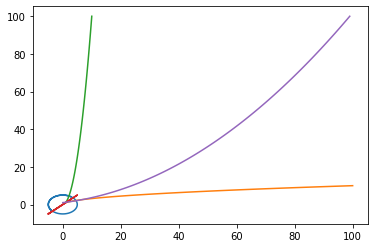

In [144]:
plt.plot(z,t,y,x,x,y,z,z,y)

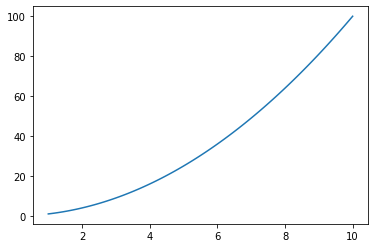

In [145]:
plt.plot(x,y)

<function matplotlib.pyplot.show(*args, **kw)>

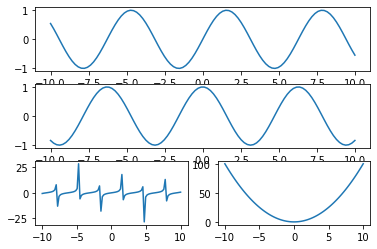

In [146]:
x=np.linspace(-10,10,100)
plt.figure
plt.subplot(3,1,1)
plt.plot(x,np.sin(x))

plt.subplot(3,1,2)
plt.plot(x,np.cos(x))

plt.subplot(3,2,5)
plt.plot(x,np.tan(x))

plt.subplot(3,2,6)
plt.plot(x,x**2)
plt.show

In [326]:
x=np.linspace(-10,10,100)
m,c=5,50
noise=np.random.randint(-10,10,100)
y=m*x+c+noise

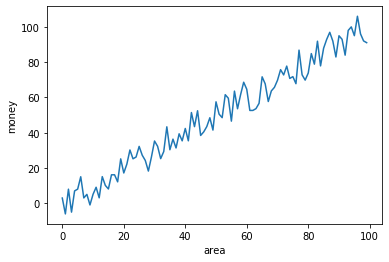

In [327]:
plt.plot(y)
plt.xlabel("area")
plt.ylabel("money")
plt.show()

In [340]:
class Linear:
    
    def __init__(self,lr=.01,maxstep=10):
        self.lr=lr
        self.max_step=maxstep
        
    def fit(self,x,y):
        self.coef=np.random.random()
        self.intercept=np.random.random()
        
        for i in range(self.max_step):
            self.gradient_decent(x,y)
            
    def gradient_decent(self,x,y):
        delta_coef,delta_intercept=self.gradient(x,y)
        print(delta_coef,delta_intercept)
        self.coef+=delta_coef
        self.intercept+=delta_intercept
    
    def gradient(self,x,y):
        yp=self.predicted(x)

        d2em=np.mean((yp-y)*x)
        d2ec=np.mean((yp-y))
        
        return -d2em*self.lr , -d2ec*self.lr  
        
    def predicted(self,x):
        return x*self.coef + self.intercept

In [341]:
a=Linear()

In [342]:
a.fit(x,y)

1.5869598191306358 0.48908327180486605
1.0472866146451334 0.4841924390868175
0.6911386413146338 0.4793505146959494
0.45610496194501066 0.4745570095489899
0.30099856074485565 0.4698114394534998
0.1986387808282548 0.46511332505896497
0.13108821899777107 0.4604621918083753
0.08650939704903401 0.4558575698902914
0.05709037650373961 0.4512989941913887
0.03767580402266995 0.44678600424947484


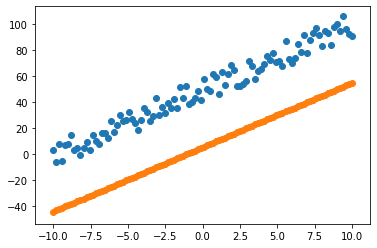

In [336]:
plt.scatter(x,y)
plt.scatter(x,a.predicted(x))

In [337]:
a.predicted(x[:10])

array([-44.05352763, -43.05427853, -42.05502942, -41.05578032,
       -40.05653122, -39.05728212, -38.05803301, -37.05878391,
       -36.05953481, -35.06028571])

In [343]:
a.predicted(y[:13])

array([ 19.63789476, -24.74136844,  44.42047208, -19.70507003,
        39.58363103,  44.5700651 ,  79.17591753,  19.98694514,
        29.90994894,   0.34039492,  30.00967762,  49.80582087,
        20.23626685])

In [3]:
x=np.linspace(-100,100,100)
a,b,c=5,5,5
noise=np.random.randn(100)*10000
y=a*(x**2) + b*x +c  +noise
x_mod=(x-np.mean(x))/np.std(x)
y_mod=-(y-np.mean(y))/(np.std(y))

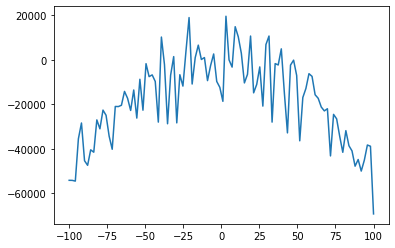

In [5]:
plt.plot(x,-y)

In [6]:
class Linear2:
    
    def __init__(self,lr=.01,maxstep=2000):
        self.lr=lr
        self.max_step=maxstep
        
    def fit(self,x,y):
        self.a=np.random.random()
        self.b=np.random.random()
        self.c=np.random.random()
        
        for i in range(self.max_step):
            self.gradient_decent(x,y)
            
    def gradient_decent(self,x,y):
        delta_a,delta_b,delta_c=self.gradient(x,y)
        self.a+=delta_a
        self.b+=delta_b
        self.c+=delta_c
        
    def gradient(self,x,y):
        yp=self.predicted(x)

        d2ea=np.mean((yp-y)*(x**2))
        d2eb=np.mean((yp-y)*x)
        d2ec=np.mean((yp-y))
        
        return -d2ea*self.lr , -d2eb*self.lr,-d2ec*self.lr  
        
    def predicted(self,x):
        return self.a*(x**2) + self.b*(x) +self.c

In [7]:
a=Linear2()

In [8]:
a.fit(x_mod,y_mod)

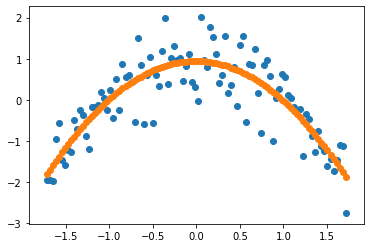

In [9]:
plt.scatter(x_mod,y_mod)
plt.scatter(x_mod,a.predicted(x_mod))

In [10]:
from sklearn.datasets import make_regression 
from sklearn.linear_model import LinearRegression

In [11]:
bias=100
x,y,coef=make_regression(n_features=1,bias=bias,noise=10,random_state=42,coef=True)

In [12]:
model=LinearRegression()

In [13]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
bias ,coef

(100, array(41.74110031))

In [15]:
model.predict(x[:10])

array([142.54856828, 105.03324069,  54.16343497, 115.12937746,
        79.87196826, 129.94656099,  80.57214453, 125.27494821,
       128.34627855, 145.7592773 ])

In [16]:
class Linear3:
    
    def __init__(self,lr=1,maxstep=10):
        self.lr=lr
        self.max_step=maxstep
        
    def fit(self,x,y):
        self.coef=np.random.random()
        self.intercept=np.random.random()
        
        errors=[]
        for i in range(self.max_step):
            err=self.gradient_decent(x,y)
            errors.append(err)
        return errors
        
    def gradient_decent(self,x,y):
        delta_coef,delta_intercept,errr=self.gradient(x,y)
        print(delta_coef,delta_intercept,errr)
        self.coef+=delta_coef
        self.intercept+=delta_intercept
        return errr
    
    def gradient(self,x,y):
        yp=self.predicted(x)
        ya=y.reshape(-1,1)
        d2em=np.mean((yp-ya)*x)
        d2ec=np.mean((yp-ya))
        
        return -d2em*self.lr , -d2ec*self.lr ,np.mean((yp-ya)**2) 
        
    def predicted(self,x):
        return x*self.coef + self.intercept

In [17]:
mode=Linear3()

In [18]:
mode.fit(x,y)

26.333242802540255 95.65402088819619 10838.55925705412
14.480922238006082 2.7346155567368835 352.5212535936909
2.7847444314586856 1.5037933430716195 90.90805825260999
0.6370715380553993 0.28918601103957753 78.68290486905195
0.1400492051030764 0.06615766055795408 78.08506294301577
0.031055858917872527 0.014543622213773304 78.05576080673833
0.006873455890810858 0.003225042793297064 78.05432445853768
0.001521912034245707 0.0007137844567159846 78.05425405046014
0.00033694865960272937 0.0001580452645306707 78.05425059913917
7.460136311671751e-05 3.499094484411103e-05 78.05425042995948


[10838.55925705412,
 352.5212535936909,
 90.90805825260999,
 78.68290486905195,
 78.08506294301577,
 78.05576080673833,
 78.05432445853768,
 78.05425405046014,
 78.05425059913917,
 78.05425042995948]

In [19]:
mode.predicted(x[:10])

array([[142.54853858],
       [105.03322889],
       [ 54.16344746],
       [115.12936084],
       [ 79.87196847],
       [129.9465373 ],
       [ 80.57214441],
       [125.27492675],
       [128.34625562],
       [145.75924606]])

In [20]:
model.predict(x[:10])

array([142.54856828, 105.03324069,  54.16343497, 115.12937746,
        79.87196826, 129.94656099,  80.57214453, 125.27494821,
       128.34627855, 145.7592773 ])

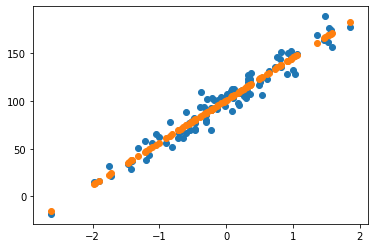

In [21]:
plt.scatter(x,y)
plt.scatter(x,mode.predicted(x))

In [22]:
h=mode.fit(x,y)

25.571041203992248 95.84834276861206 10810.531509274004
14.369474469668319 2.655463575175473 347.7843428218008
2.7572784456743817 1.4922198804583973 90.66788171867263
0.6311264713911853 0.28633376406909006 78.67111276880497
0.13872633359300626 0.06554028608920437 78.08448486324464
0.030763295145554075 0.014406246614486022 78.05573246984248
0.006808665991130134 0.003194661064433504 78.05432306949616
0.0015075681896138703 0.0007070562512855361 78.05425398237094
0.00033377286720496444 0.00015655570622485015 78.05425059580149
7.389823831110753e-05 3.466114985798186e-05 78.05425042979587


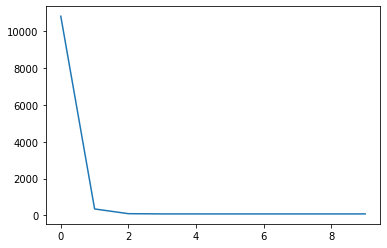

In [23]:
plt.plot(h)

In [141]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [142]:
bias=100
x,y,coef=make_regression(n_features=5,random_state=42,coef=True,bias=bias,noise=20)

In [143]:
model=LinearRegression()

In [144]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
model.predict(x[:10])

array([  48.67671874,   51.57311539, -154.38401162,  205.60064772,
        -11.95589467,  -47.94740358,  206.48108867,  147.51891708,
        -44.28408055,   14.17317706])

In [146]:
x.shape

(100, 5)

In [147]:
y.shape

(100,)

In [151]:
class Linear3:
    def __init__(self,lr=0.01,maxstep=1500):
        self.lr=lr
        self.maxstep=maxstep
        
    def fit(self,x,y):
        self.coef=np.random.randn(x.shape[1])
        self.intercept=np.random.random()
        erros=[]
        for i in range(self.maxstep):
            err=self.gradint_decent(x,y)
            erros.append(err)
        return erros
            
    def gradint_decent(self,x,y):
        delta_coef , delta_intercept,errr=self.gradint(x,y)
        #print(delta_coef,delta_intercept)
        self.coef+=delta_coef
        self.intercept+=delta_intercept
        return errr
    
    def gradint(self,x,y):
        yp=self.predicted(x)
        ya=y.reshape(-1,1)
        diff=yp-ya
        print(np.dot(diff.T,x).flatten()/len(x))
        de2m=np.dot(diff.T,x).flatten()/len(x)
        de2c=np.mean(diff,axis=0)
        
        return -de2m*self.lr , -de2c*self.lr,np.mean(diff**2)
        
    def predicted(self,x):
        return np.sum(x*self.coef , keepdims=True,axis=1) + self.intercept   ### np.sum(a,axis=1,keepdims=True)
    

In [152]:
a=Linear3()

In [155]:
#a.fit(x,y)

In [156]:
a.predicted(x[:10])

array([[  48.67882814],
       [  51.57266757],
       [-154.37798138],
       [ 205.59826037],
       [ -11.94833197],
       [ -47.94075793],
       [ 206.47923941],
       [ 147.51912894],
       [ -44.28616931],
       [  14.17495845]])

In [157]:
model.predict(x[:10])

array([  48.67671874,   51.57311539, -154.38401162,  205.60064772,
        -11.95589467,  -47.94740358,  206.48108867,  147.51891708,
        -44.28408055,   14.17317706])

In [158]:
b=a.fit(x,y)

[ -66.81670902 -101.63143204  -19.82592339  -62.77920152  -36.88315648]
[ -66.04459463 -100.53212097  -19.9646607   -61.99455294  -36.52160903]
[-65.28185052 -99.44511823 -20.09881421 -61.21993538 -36.16357289]
[-64.52835946 -98.37028241 -20.22846259 -60.45522021 -35.80901359]
[-63.78400571 -97.30747378 -20.35368334 -59.70028042 -35.45789703]
[-63.04867499 -96.25655423 -20.47455286 -58.95499062 -35.11018943]
[-62.32225448 -95.21738727 -20.5911464  -58.21922703 -34.76585734]
[-61.60463282 -94.189838   -20.70353813 -57.49286746 -34.42486768]
[-60.89570003 -93.17377311 -20.81180114 -56.77579126 -34.08718769]
[-60.19534755 -92.16906085 -20.91600743 -56.06787936 -33.75278492]
[-59.5034682  -91.175571   -21.01622797 -55.36901416 -33.42162727]
[-58.81995615 -90.19317486 -21.11253265 -54.67907962 -33.09368296]
[-58.14470694 -89.22174526 -21.20499038 -53.99796113 -32.76892052]
[-57.47761741 -88.26115649 -21.29366902 -53.32554559 -32.44730881]
[-56.81858573 -87.31128431 -21.37863546 -52.66172132

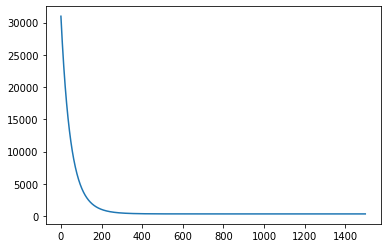

In [159]:
plt.plot(b)

In [160]:
y[:10]

array([  11.35722629,   32.9042046 , -170.59069956,  221.2949413 ,
        -16.58822164,  -40.3218166 ,  218.31056227,  137.46809041,
        -45.44347212,   37.3874391 ])

In [161]:
x.shape

(100, 5)

In [162]:
x[:10]

array([[ 0.97511973, -0.67716171, -0.01224677, -0.89725437,  0.07580456],
       [ 0.08187414, -0.48536355,  0.75896922, -0.77282521, -0.23681861],
       [-1.4123037 , -0.90802408, -0.56228753, -1.01283112,  0.31424733],
       [-0.64511975,  0.36163603,  1.35624003, -0.07201012,  1.0035329 ],
       [-0.62269952,  0.28099187, -1.9520878 , -0.1517851 ,  0.58831721],
       [-0.45006547,  0.04698059, -1.59442766, -0.59937502,  0.0052437 ],
       [ 0.77463405,  0.44381943, -0.48423407,  1.26691115, -0.70766947],
       [ 0.35701549,  0.8496021 , -0.20812225, -0.49300093, -0.58936476],
       [-1.3044695 , -0.08912004,  0.38406545, -0.03269475, -2.0674421 ],
       [ 0.17318093, -1.24573878, -0.44651495,  0.85639879,  0.21409374]])

In [163]:
y=np.random.randn(x.shape[1])

In [164]:
y

array([ 0.60977222,  1.3174009 , -0.14838079, -0.8922309 ,  0.44709616])

In [165]:
#a=np.array([[1,2,3,4],[5,6,7,7]])

In [166]:
b=np.hstack(np.random.randn(x.shape[1],1))

In [167]:
b

array([ 1.77035951, -0.69472286,  0.56960951,  0.39504675, -0.04753842])

In [168]:
a=np.random.randint(0,100,size=100).reshape(100,1)

In [169]:
a

array([[25],
       [32],
       [32],
       [49],
       [19],
       [89],
       [72],
       [32],
       [96],
       [53],
       [23],
       [43],
       [10],
       [86],
       [37],
       [ 3],
       [ 3],
       [ 6],
       [37],
       [59],
       [89],
       [62],
       [91],
       [79],
       [50],
       [58],
       [18],
       [90],
       [28],
       [52],
       [27],
       [43],
       [21],
       [85],
       [30],
       [93],
       [75],
       [39],
       [21],
       [67],
       [89],
       [10],
       [13],
       [54],
       [11],
       [41],
       [98],
       [30],
       [58],
       [ 5],
       [18],
       [77],
       [69],
       [80],
       [52],
       [97],
       [24],
       [79],
       [ 9],
       [35],
       [62],
       [85],
       [60],
       [28],
       [28],
       [20],
       [90],
       [25],
       [96],
       [91],
       [59],
       [22],
       [91],
       [66],
       [69],
       [36],
       [86],

In [170]:
b=np.random.randint(0,100,size=500).reshape(100,5)

In [171]:
np.dot(a.T,b)

array([[255292, 275082, 258354, 245276, 223264]])